<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Evaluation-of-TPC-H-Benchmarking-Throughput" data-toc-modified-id="Evaluation-of-TPC-H-Benchmarking-Throughput-1">Evaluation of TPC-H Benchmarking Throughput</a></span><ul class="toc-item"><li><span><a href="#Import-some-libraries" data-toc-modified-id="Import-some-libraries-1.1">Import some libraries</a></span></li></ul></li><li><span><a href="#Load-Results" data-toc-modified-id="Load-Results-2">Load Results</a></span><ul class="toc-item"><li><span><a href="#Load-Results-and-Generate-Common-DataFrame" data-toc-modified-id="Load-Results-and-Generate-Common-DataFrame-2.1">Load Results and Generate Common DataFrame</a></span></li><li><span><a href="#Results-in-Format-&quot;time&quot;" data-toc-modified-id="Results-in-Format-&quot;time&quot;-2.2">Results in Format "time"</a></span></li><li><span><a href="#Results-in-Format-&quot;Throughput&quot;" data-toc-modified-id="Results-in-Format-&quot;Throughput&quot;-2.3">Results in Format "Throughput"</a></span></li></ul></li><li><span><a href="#Loading-Phase" data-toc-modified-id="Loading-Phase-3">Loading Phase</a></span><ul class="toc-item"><li><span><a href="#Plot-Throughput" data-toc-modified-id="Plot-Throughput-3.1">Plot Throughput</a></span></li><li><span><a href="#Plot-Time" data-toc-modified-id="Plot-Time-3.2">Plot Time</a></span></li><li><span><a href="#Plot-Indexing" data-toc-modified-id="Plot-Indexing-3.3">Plot Indexing</a></span></li><li><span><a href="#Plot-Constraints" data-toc-modified-id="Plot-Constraints-3.4">Plot Constraints</a></span></li><li><span><a href="#Plot-Statistics" data-toc-modified-id="Plot-Statistics-3.5">Plot Statistics</a></span></li></ul></li><li><span><a href="#Benchmarking-Phase" data-toc-modified-id="Benchmarking-Phase-4">Benchmarking Phase</a></span><ul class="toc-item"><li><span><a href="#Plot-Throughput" data-toc-modified-id="Plot-Throughput-4.1">Plot Throughput</a></span></li><li><span><a href="#Plot-Hardware-Metrics" data-toc-modified-id="Plot-Hardware-Metrics-4.2">Plot Hardware Metrics</a></span></li></ul></li></ul></div>

# Evaluation of TPC-H Benchmarking Throughput

<img src="https://raw.githubusercontent.com/Beuth-Erdelt/Benchmark-Experiment-Host-Manager/master/docs/workflow-sketch-simple.png"/>

## Import some libraries

In [176]:
from dbmsbenchmarker import *
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

# Some plotly figures
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# Some nice output
from IPython.display import display, Markdown

import logging
logging.basicConfig(level=logging.INFO)

import re

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [177]:
# path of folder containing experiment results
resultfolder = "/home/perdelt/benchmarks/"

# create evaluation object for result folder
evaluate = inspector.inspector(resultfolder)

# list of experiments to be combined
# 10, 12, 13, 14, 15, 19, 22, 23, 24, 25, 27, 28, 29, 2, 36, 3, 4, 5, 11, 17, 21, 34
codes = [1745499973,1745501773,1745502673,1745503573,1745504473,1745506273,1745508973,1745509873,1745510773,1745511673,1745512573,1745513473,1745514373,
        1745507173,
        1745517073,
        1745515273,
        1745517973,
        1745518873,
        1745568811,
        1745571734,
        1745572634,
        1745573534
        ]

# Load Results

In [178]:
import ast
import json
import statistics
import pandas as pd

def generate_df(code):
    global SF, dbms, imported, portion_of_data
    path=resultfolder
    with open(path+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    # loading
    evaluate.load_experiment(code)
    df = evaluate.get_loading_metrics('total_cpu_memory')
    df = df.T.max().sort_index()
    df = pd.DataFrame(df)
    hw_memory = df[0]
    df = evaluate.get_loading_metrics('total_cpu_util_s')
    df = df.T.max().sort_index() - df.T.min().sort_index()
    df = pd.DataFrame(df)
    hw_cpu = df[0]
    # benchmarking
    df = evaluate.get_streaming_metrics('total_cpu_memory')
    df = df.T.max().sort_index()
    df = pd.DataFrame(df)
    hw_memory_stream = df[0]
    df = evaluate.get_streaming_metrics('total_cpu_util_s')
    df = df.T.max().sort_index() - df.T.min().sort_index()
    df = pd.DataFrame(df)
    hw_cpu_stream = df[0]
    # data generator
    df = evaluate.get_datagenerator_metrics('total_cpu_memory')
    df = df.T.max().sort_index()
    df = pd.DataFrame(df)
    hw_memory_datagenerator = df[0]
    #print(hw_memory_datagenerator)
    df = evaluate.get_datagenerator_metrics('total_cpu_util_s')
    df = df.T.max().sort_index() - df.T.min().sort_index()
    df = pd.DataFrame(df)
    hw_cpu_datagenerator = df[0]
    # loader
    df = evaluate.get_loader_metrics('total_cpu_memory')
    df = df.T.max().sort_index()
    df = pd.DataFrame(df)
    hw_memory_loader = df[0]
    df = evaluate.get_loader_metrics('total_cpu_util_s')
    df = df.T.max().sort_index() - df.T.min().sort_index()
    df = pd.DataFrame(df)
    hw_cpu_loader = df[0]
    # benchmarker
    df = evaluate.get_benchmarker_metrics('total_cpu_memory')
    df = df.T.max().sort_index()
    df = pd.DataFrame(df)
    hw_memory_benchmarker = df[0]
    df = evaluate.get_benchmarker_metrics('total_cpu_util_s')
    df = df.T.max().sort_index() - df.T.min().sort_index()
    df = pd.DataFrame(df)
    hw_cpu_benchmarker = df[0]
    # benchmark
    df = evaluate.get_aggregated_experiment_statistics(type='timer', name='run', query_aggregate='Mean', total_aggregate='Mean')
    df_mean = (df/1000.0).sort_index()
    #print(df_mean)
    df = evaluate.get_aggregated_experiment_statistics(type='timer', name='run', query_aggregate='Median', total_aggregate='Geo')
    df_geo = (df/1000.0).sort_index()
    #print(df_geo)
    #df_metric[0]['PostgreSQL-BHT-1-1-1']
    #df_metric.plot()
    #pretty_connections = json.dumps(connections, indent=2)
    df_merged_time = pd.DataFrame()
    df_merged_tpx = pd.DataFrame()
    for c in connections_sorted:
        #print(c)
        connection_name = c['name']
        orig_name = c['orig_name']
        #print(connection_name, orig_name)
        properties = evaluate.get_experiment_connection_properties(connection_name)
        dbms = properties['docker']
        #print(properties)
        # load
        if orig_name in hw_cpu:
            hw_cpu_c = hw_cpu[orig_name]
        else:
            hw_cpu_c = 0
        if orig_name in hw_memory:
            hw_memory_c = hw_memory[orig_name]
        else:
            hw_memory_c = 0
        # stream
        if orig_name in hw_cpu_stream:
            hw_cpu_stream_c = hw_cpu_stream[orig_name]
        else:
            hw_cpu_stream_c = 0
        if orig_name in hw_memory_stream:
            hw_memory_stream_c = hw_memory_stream[orig_name]
        else:
            hw_memory_stream_c = 0
        # loader
        if orig_name in hw_cpu_loader:
            hw_cpu_loader_c = hw_cpu_loader[orig_name]
        else:
            hw_cpu_loader_c = 0
        if orig_name in hw_memory_loader:
            hw_memory_loader_c = hw_memory_loader[orig_name]
        else:
            hw_memory_loader_c = 0
        # data generator
        if orig_name in hw_cpu_datagenerator:
            hw_cpu_datagenerator_c = hw_cpu_datagenerator[orig_name]
        else:
            hw_cpu_datagenerator_c = 0
        if orig_name in hw_memory_datagenerator:
            hw_memory_datagenerator_c = hw_memory_datagenerator[orig_name]
        else:
            hw_memory_datagenerator_c = 0
        # benchmarker
        if orig_name in hw_cpu_benchmarker:
            hw_cpu_benchmarker_c = hw_cpu_benchmarker[orig_name]
        else:
            hw_cpu_benchmarker_c = 0
        if orig_name in hw_memory_benchmarker:
            hw_memory_benchmarker_c = hw_memory_benchmarker[orig_name]
        else:
            hw_memory_benchmarker_c = 0
        results = dict()
        eva = evaluate.get_experiment_connection_properties(c['name'])
        SF = int(c['parameter']['connection_parameter']['loading_parameters']['SF'])
        if 'TPCH_TABLE' in c['parameter']['connection_parameter']['loading_parameters']:
            TPCH_TABLE = c['parameter']['connection_parameter']['loading_parameters']['TPCH_TABLE']
        else:
            TPCH_TABLE = ''
        imported = TPCH_TABLE
        #print(c['hostsystem'])
        #df['CPU'] = c['hostsystem']['CPU']
        #df['Cores'] = c['hostsystem']['Cores']
        #df['node'] = c['hostsystem']['node']
        if len(c['hostsystem']['loading_timespans']['sensor']) == 0:
            continue
        timespan_load = max([end for (start,end) in c['hostsystem']['loading_timespans']['sensor']]) - min([start for (start,end) in c['hostsystem']['loading_timespans']['sensor']])
        timespan_benchmark = eva['times']['total'][c['name']]['time_end']-eva['times']['total'][c['name']]['time_start']
        results[connection_name] = {
            'load':eva['times']['load_ms']/1000.,
            'ingest':eva['times']['ingest_ms']/1000.,
            'generate':eva['times']['generate_ms']/1000.,
            'schema':eva['times']['schema_ms']/1000.,
            #'index':eva['times']['index_ms']/1000.,
            'loaded':eva['times']['script_times']['loaded'],
            'initschema':eva['times']['script_times']['initschema'],
            'span_load':timespan_load,
            'span_benchmark':timespan_benchmark,
            #'mean_generate': statistics.mean([end-start for (start,end) in c['hostsystem']['loading_timespans']['datagenerator']]),
            #'max_generate': max([end-start for (start,end) in c['hostsystem']['loading_timespans']['datagenerator']]),
            #'min_generate': min([end-start for (start,end) in c['hostsystem']['loading_timespans']['datagenerator']]),
            'mean_load': statistics.mean([end-start for (start,end) in c['hostsystem']['loading_timespans']['sensor']]),
            'max_load': max([end-start for (start,end) in c['hostsystem']['loading_timespans']['sensor']]),
            'min_load': min([end-start for (start,end) in c['hostsystem']['loading_timespans']['sensor']]),
            'span_generate': c['timeGenerate'],
            #'pods': int(c['parameter']['connection_parameter']['loading_parameters']['PODS_PARALLEL']),
            #'indexed':eva['times']['script_times']['indexed'],
            'initindexes':eva['times']['script_times']['initindexes'],
            'initconstraints':eva['times']['script_times']['initconstraints'],
            'initstatistics':eva['times']['script_times']['initstatistics'],
            'benchmark_mean':df_mean.loc[connection_name]['total_timer_run'],
            'benchmark_geo':df_geo.loc[connection_name]['total_timer_run'],
        }
        # DataFrame of time
        df = pd.DataFrame(results).T
        df_time = df.copy()
        df_tpx = df.copy()
        # Compute DataFrame of throughput (Tpx)
        df_tpx = 3600*int(SF)/df_tpx * portion_of_data
        # Set Values that are same for time and tpx
        df_time['SF'] = int(SF)
        df_tpx['SF'] = int(SF)
        df_time['dbms'] = dbms
        df_tpx['dbms'] = dbms
        df_time['TPCH_TABLE'] = TPCH_TABLE
        df_tpx['TPCH_TABLE'] = TPCH_TABLE
        df_time['CPU'] = c['hostsystem']['CPU']
        df_time['Cores'] = c['hostsystem']['Cores']
        df_time['node'] = c['hostsystem']['node']
        df_tpx['CPU'] = c['hostsystem']['CPU']
        df_tpx['Cores'] = c['hostsystem']['Cores']
        df_tpx['node'] = c['hostsystem']['node']
        df_time['pods'] = int(c['parameter']['connection_parameter']['loading_parameters']['PODS_PARALLEL'])
        df_tpx['pods'] = int(c['parameter']['connection_parameter']['loading_parameters']['PODS_PARALLEL'])
        #df_time['threads'] = int(c['parameter']['connection_parameter']['loading_parameters']['MYSQL_LOADING_THREADS'])
        #df_tpx['threads'] = int(c['parameter']['connection_parameter']['loading_parameters']['MYSQL_LOADING_THREADS'])
        df_time['num_experiment'] = int(c['parameter']['numExperiment'])
        df_tpx['num_experiment'] = int(c['parameter']['numExperiment'])
        df_time['num_client'] = int(c['parameter']['client'])
        df_tpx['num_client'] = int(c['parameter']['client'])
        df_time['benchmark_start'] = eva['times']['total'][c['name']]['time_start']
        df_time['benchmark_end'] = eva['times']['total'][c['name']]['time_end']
        df_tpx['benchmark_start'] = eva['times']['total'][c['name']]['time_start']
        df_tpx['benchmark_end'] = eva['times']['total'][c['name']]['time_end']
        df_time['mem_max_load'] = hw_memory_c
        df_tpx['mem_max_load'] = hw_memory_c
        # load
        df_time['mem_max_load'] = hw_memory_c
        df_tpx['mem_max_load'] = hw_memory_c
        df_time['cpu_total_load'] = hw_cpu_c
        df_tpx['cpu_total_load'] = hw_cpu_c
        # stream
        df_time['mem_max_stream'] = hw_memory_stream_c
        df_tpx['mem_max_stream'] = hw_memory_stream_c
        df_time['cpu_total_stream'] = hw_cpu_stream_c
        df_tpx['cpu_total_stream'] = hw_cpu_stream_c
        # loader
        df_time['mem_max_loader'] = hw_memory_loader_c
        df_tpx['mem_max_loader'] = hw_memory_loader_c
        df_time['cpu_total_loader'] = hw_cpu_loader_c
        df_tpx['cpu_total_loader'] = hw_cpu_loader_c
        # data generator
        df_time['mem_max_datagenerator'] = hw_memory_datagenerator_c
        df_tpx['mem_max_datagenerator'] = hw_memory_datagenerator_c
        df_time['cpu_total_datagenerator'] = hw_cpu_datagenerator_c
        df_tpx['cpu_total_datagenerator'] = hw_cpu_datagenerator_c
        # benchmarker
        df_time['mem_max_benchmarker'] = hw_memory_benchmarker_c
        df_tpx['mem_max_benchmarker'] = hw_memory_benchmarker_c
        df_time['cpu_total_benchmarker'] = hw_cpu_benchmarker_c
        df_tpx['cpu_total_benchmarker'] = hw_cpu_benchmarker_c
        df_merged_time = pd.concat([df_merged_time, df_time])
        df_merged_tpx = pd.concat([df_merged_tpx, df_tpx])
    return df_merged_time, df_merged_tpx

def merge_experiments(df_time, df_tpx, code):
    df_time_tmp, df_tpx_tmp = generate_df(code)
    df_time = pd.concat([df_time, df_time_tmp])
    df_tpx = pd.concat([df_tpx, df_tpx_tmp])
    return df_time, df_tpx

## Load Results and Generate Common DataFrame

In [179]:
df_time = pd.DataFrame()
df_tpx = pd.DataFrame()

portion_of_data = 1.0 # for lineitem table = 0.7, for all tables = 1.0

for code in codes:
    df_time, df_tpx = merge_experiments(df_time, df_tpx, code)

## Results in Format "time"

In [180]:
df_time.T

,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,...,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1
load,1559.0,1559.0,1407.0,1407.0,1639.0,1639.0,1358.0,1358.0,1545.0,1545.0,...,1200.0,1200.0,1087.0,1087.0,548.0,548.0,545.0,545.0,525.0,525.0
ingest,624.0,624.0,473.0,473.0,704.0,704.0,442.0,442.0,600.0,600.0,...,418.0,418.0,338.0,338.0,250.0,250.0,222.0,222.0,209.0,209.0
generate,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
schema,10.0,10.0,8.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,...,10.0,10.0,9.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0
loaded,10.0,10.0,8.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,...,10.0,10.0,9.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0
initschema,10.0,10.0,8.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,...,10.0,10.0,9.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0
span_load,624.0,624.0,473.0,473.0,704.0,704.0,442.0,442.0,600.0,600.0,...,418.0,418.0,338.0,338.0,250.0,250.0,222.0,222.0,209.0,209.0
span_benchmark,183.0,186.0,202.0,205.0,208.0,205.0,185.0,192.0,228.0,206.0,...,171.0,185.0,151.0,151.0,126.0,135.0,127.0,163.0,78.0,85.0
mean_load,389.25,389.25,314.25,314.25,393.5,393.5,275.875,275.875,370.125,370.125,...,225.625,225.625,230.0,230.0,108.375,108.375,98.625,98.625,107.5,107.5
max_load,624.0,624.0,473.0,473.0,703.0,703.0,442.0,442.0,600.0,600.0,...,418.0,418.0,338.0,338.0,250.0,250.0,222.0,222.0,209.0,209.0


## Results in Format "Throughput"

In [181]:
df_tpx.T

,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,...,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1,MonetDB-BHT-8-1-1,MonetDB-BHT-8-2-1
load,23.091725,23.091725,25.586354,25.586354,21.964613,21.964613,26.509573,26.509573,23.300971,23.300971,...,30.0,30.0,33.118675,33.118675,65.693431,65.693431,66.055046,66.055046,68.571429,68.571429
ingest,57.692308,57.692308,76.109937,76.109937,51.136364,51.136364,81.447964,81.447964,60.0,60.0,...,86.124402,86.124402,106.508876,106.508876,144.0,144.0,162.162162,162.162162,172.248804,172.248804
generate,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,...,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0
schema,3600.0,3600.0,4500.0,4500.0,4500.0,4500.0,3600.0,3600.0,3600.0,3600.0,...,3600.0,3600.0,4000.0,4000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0
loaded,3600.0,3600.0,4500.0,4500.0,4500.0,4500.0,3600.0,3600.0,3600.0,3600.0,...,3600.0,3600.0,4000.0,4000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0
initschema,3600.0,3600.0,4500.0,4500.0,4500.0,4500.0,3600.0,3600.0,3600.0,3600.0,...,3600.0,3600.0,4000.0,4000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0
span_load,57.692308,57.692308,76.109937,76.109937,51.136364,51.136364,81.447964,81.447964,60.0,60.0,...,86.124402,86.124402,106.508876,106.508876,144.0,144.0,162.162162,162.162162,172.248804,172.248804
span_benchmark,196.721311,193.548387,178.217822,175.609756,173.076923,175.609756,194.594595,187.5,157.894737,174.757282,...,210.526316,194.594595,238.410596,238.410596,285.714286,266.666667,283.464567,220.858896,461.538462,423.529412
mean_load,92.485549,92.485549,114.558473,114.558473,91.486658,91.486658,130.493883,130.493883,97.264438,97.264438,...,159.556787,159.556787,156.521739,156.521739,332.179931,332.179931,365.019011,365.019011,334.883721,334.883721
max_load,57.692308,57.692308,76.109937,76.109937,51.209104,51.209104,81.447964,81.447964,60.0,60.0,...,86.124402,86.124402,106.508876,106.508876,144.0,144.0,162.162162,162.162162,172.248804,172.248804


# Benchmarking Phase

In [182]:
#benchmark_start = df_time.groupby(['node','SF', 'num_experiment', 'num_client']).min('benchmark_start')
benchmark_start = df_time.groupby(['node', 'num_client']).min('benchmark_start')

benchmark_start

load  ingest  generate  schema  loaded  initschema  \
node        num_client                                                         
cl-worker10 1           1559.0   624.0       1.0    10.0    10.0        10.0   
            2           1559.0   624.0       1.0    10.0    10.0        10.0   
cl-worker11 1           1087.0   338.0       1.0     9.0     9.0         9.0   
            2           1087.0   338.0       1.0     9.0     9.0         9.0   
cl-worker12 1           1407.0   473.0       1.0     8.0     8.0         8.0   
            2           1407.0   473.0       1.0     8.0     8.0         8.0   
cl-worker13 1           1639.0   704.0       1.0     8.0     8.0         8.0   
            2           1639.0   704.0       1.0     8.0     8.0         8.0   
cl-worker14 1           1358.0   442.0       1.0    10.0    10.0        10.0   
            2           1358.0   442.0       1.0    10.0    10.0        10.0   
cl-worker15 1           1545.0   600.0       1.0    10.0    10.0        10.0   
            2           1545.0   600.0       1.0    10.0    10.0        10.0   
cl-worker17 1            548.0   250.0       1.0     1.0     1.0         1.0   
            2            548.0   250.0       1.0     1.0     1.0         1.0   
cl-worker19 1            570.0   267.0       1.0     1.0     1.0         1.0   
            2            570.0   267.0       1.0     1.0     1.0         1.0   
cl-worker2  1           1125.0   420.0       1.0     2.0     2.0         2.0   
            2           1125.0   420.0       1.0     2.0     2.0         2.0   
cl-worker21 1            545.0   222.0       1.0     1.0     1.0         1.0   
            2            545.0   222.0       1.0     1.0     1.0         1.0   
cl-worker22 1            680.0   237.0       1.0     5.0     5.0         5.0   
            2            680.0   237.0       1.0     5.0     5.0         5.0   
cl-worker23 1            499.0   161.0       1.0     1.0     1.0         1.0   
            2            499.0   161.0       1.0     1.0     1.0         1.0   
cl-worker24 1            594.0   223.0       1.0     1.0     1.0         1.0   
            2            594.0   223.0       1.0     1.0     1.0         1.0   
cl-worker25 1            601.0   226.0       1.0     1.0     1.0         1.0   
            2            601.0   226.0       1.0     1.0     1.0         1.0   
cl-worker27 1            894.0   275.0       1.0     1.0     1.0         1.0   
            2            894.0   275.0       1.0     1.0     1.0         1.0   
cl-worker28 1            768.0   302.0       0.0     1.0     1.0         1.0   
            2            768.0   302.0       0.0     1.0     1.0         1.0   
cl-worker29 1            581.0   254.0       1.0     1.0     1.0         1.0   
            2            581.0   254.0       1.0     1.0     1.0         1.0   
cl-worker3  1            960.0   336.0       0.0     2.0     2.0         2.0   
            2            960.0   336.0       0.0     2.0     2.0         2.0   
cl-worker34 1            525.0   209.0       1.0     1.0     1.0         1.0   
            2            525.0   209.0       1.0     1.0     1.0         1.0   
cl-worker36 1            629.0   444.0       1.0     1.0     1.0         1.0   
            2            629.0   444.0       1.0     1.0     1.0         1.0   
cl-worker4  1           1102.0   384.0       1.0    10.0    10.0        10.0   
            2           1102.0   384.0       1.0    10.0    10.0        10.0   
cl-worker5  1           1200.0   418.0       1.0    10.0    10.0        10.0   
            2           1200.0   418.0       1.0    10.0    10.0        10.0   

                        span_load  span_benchmark  mean_load  max_load  ...  \
node        num_client                                                  ...   
cl-worker10 1               624.0           183.0    389.250     624.0  ...   
            2               624.0           186.0    389.250     624.0  ...   
cl-worker11 1               3

In [183]:
#benchmark_end = df_time.groupby(['node','SF', 'num_experiment', 'num_client']).max('benchmark_end')
benchmark_end = df_time.groupby(['node', 'num_client']).max('benchmark_end')

benchmark_end

load  ingest  generate  schema  loaded  initschema  \
node        num_client                                                         
cl-worker10 1           1559.0   624.0       1.0    10.0    10.0        10.0   
            2           1559.0   624.0       1.0    10.0    10.0        10.0   
cl-worker11 1           1087.0   338.0       1.0     9.0     9.0         9.0   
            2           1087.0   338.0       1.0     9.0     9.0         9.0   
cl-worker12 1           1407.0   473.0       1.0     8.0     8.0         8.0   
            2           1407.0   473.0       1.0     8.0     8.0         8.0   
cl-worker13 1           1639.0   704.0       1.0     8.0     8.0         8.0   
            2           1639.0   704.0       1.0     8.0     8.0         8.0   
cl-worker14 1           1358.0   442.0       1.0    10.0    10.0        10.0   
            2           1358.0   442.0       1.0    10.0    10.0        10.0   
cl-worker15 1           1545.0   600.0       1.0    10.0    10.0        10.0   
            2           1545.0   600.0       1.0    10.0    10.0        10.0   
cl-worker17 1            548.0   250.0       1.0     1.0     1.0         1.0   
            2            548.0   250.0       1.0     1.0     1.0         1.0   
cl-worker19 1            570.0   267.0       1.0     1.0     1.0         1.0   
            2            570.0   267.0       1.0     1.0     1.0         1.0   
cl-worker2  1           1125.0   420.0       1.0     2.0     2.0         2.0   
            2           1125.0   420.0       1.0     2.0     2.0         2.0   
cl-worker21 1            545.0   222.0       1.0     1.0     1.0         1.0   
            2            545.0   222.0       1.0     1.0     1.0         1.0   
cl-worker22 1            680.0   237.0       1.0     5.0     5.0         5.0   
            2            680.0   237.0       1.0     5.0     5.0         5.0   
cl-worker23 1            499.0   161.0       1.0     1.0     1.0         1.0   
            2            499.0   161.0       1.0     1.0     1.0         1.0   
cl-worker24 1            594.0   223.0       1.0     1.0     1.0         1.0   
            2            594.0   223.0       1.0     1.0     1.0         1.0   
cl-worker25 1            601.0   226.0       1.0     1.0     1.0         1.0   
            2            601.0   226.0       1.0     1.0     1.0         1.0   
cl-worker27 1            894.0   275.0       1.0     1.0     1.0         1.0   
            2            894.0   275.0       1.0     1.0     1.0         1.0   
cl-worker28 1            768.0   302.0       0.0     1.0     1.0         1.0   
            2            768.0   302.0       0.0     1.0     1.0         1.0   
cl-worker29 1            581.0   254.0       1.0     1.0     1.0         1.0   
            2            581.0   254.0       1.0     1.0     1.0         1.0   
cl-worker3  1            960.0   336.0       0.0     2.0     2.0         2.0   
            2            960.0   336.0       0.0     2.0     2.0         2.0   
cl-worker34 1            525.0   209.0       1.0     1.0     1.0         1.0   
            2            525.0   209.0       1.0     1.0     1.0         1.0   
cl-worker36 1            629.0   444.0       1.0     1.0     1.0         1.0   
            2            629.0   444.0       1.0     1.0     1.0         1.0   
cl-worker4  1           1102.0   384.0       1.0    10.0    10.0        10.0   
            2           1102.0   384.0       1.0    10.0    10.0        10.0   
cl-worker5  1           1200.0   418.0       1.0    10.0    10.0        10.0   
            2           1200.0   418.0       1.0    10.0    10.0        10.0   

                        span_load  span_benchmark  mean_load  max_load  ...  \
node        num_client                                                  ...   
cl-worker10 1               624.0           183.0    389.250     624.0  ...   
            2               624.0           186.0    389.250     624.0  ...   
cl-worker11 1               3

In [184]:
df_benchmark = pd.DataFrame(benchmark_end['benchmark_end'] - benchmark_start['benchmark_start'])

df_benchmark.columns = ['span_benchmark']

df_benchmark

span_benchmark
node        num_client                
cl-worker10 1                      183
            2                      186
cl-worker11 1                      151
            2                      151
cl-worker12 1                      202
            2                      205
cl-worker13 1                      208
            2                      205
cl-worker14 1                      185
            2                      192
cl-worker15 1                      228
            2                      206
cl-worker17 1                      126
            2                      135
cl-worker19 1                      162
            2                      115
cl-worker2  1                      179
            2                      196
cl-worker21 1                      127
            2                      163
cl-worker22 1                       83
            2                       76
cl-worker23 1                       76
            2                       92
cl-worker24 1                       85
            2                       95
cl-worker25 1                       98
            2                       86
cl-worker27 1                       75
            2                       74
cl-worker28 1                       90
            2                       90
cl-worker29 1                       99
            2                      133
cl-worker3  1                      168
            2                      176
cl-worker34 1                       78
            2                       85
cl-worker36 1                       56
            2                       60
cl-worker4  1                      152
            2                      161
cl-worker5  1                      171
            2                      185

In [185]:
#benchmark_count = df_time.groupby(['node','SF', 'num_experiment', 'num_client']).count()

#benchmark_count

In [186]:
#df_benchmark['count'] = benchmark_count['benchmark_geo']
import re

# Natural sort helpers
def convert(text):
    return int(text) if text.isdigit() else text.lower()

def alphanum_key(key):
    return [convert(c) for c in re.split('([0-9]+)', key)]

def natural_sort_multiindex(index, level=0):
    return sorted(index, key=lambda x: alphanum_key(str(x[level])))
    
# Apply natural sort to index
sorted_index = natural_sort_multiindex(df_benchmark.index, level=0)
df_sorted = df_benchmark.loc[sorted_index]

df_sorted

span_benchmark
node        num_client                
cl-worker2  1                      179
            2                      196
cl-worker3  1                      168
            2                      176
cl-worker4  1                      152
            2                      161
cl-worker5  1                      171
            2                      185
cl-worker10 1                      183
            2                      186
cl-worker11 1                      151
            2                      151
cl-worker12 1                      202
            2                      205
cl-worker13 1                      208
            2                      205
cl-worker14 1                      185
            2                      192
cl-worker15 1                      228
            2                      206
cl-worker17 1                      126
            2                      135
cl-worker19 1                      162
            2                      115
cl-worker21 1                      127
            2                      163
cl-worker22 1                       83
            2                       76
cl-worker23 1                       76
            2                       92
cl-worker24 1                       85
            2                       95
cl-worker25 1                       98
            2                       86
cl-worker27 1                       75
            2                       74
cl-worker28 1                       90
            2                       90
cl-worker29 1                       99
            2                      133
cl-worker34 1                       78
            2                       85
cl-worker36 1                       56
            2                       60

In [187]:
# Average span_benchmark per node (first level of index)
avg_per_node = df_sorted.groupby(level=0).mean()
sorted_index = natural_sort(avg_per_node.index)
avg_per_node = avg_per_node.loc[sorted_index]
avg_per_node

,span_benchmark
node,
cl-worker2,187.5
cl-worker3,172.0
cl-worker4,156.5
cl-worker5,178.0
cl-worker10,184.5
cl-worker11,151.0
cl-worker12,203.5
cl-worker13,206.5
cl-worker14,188.5


<Axes: xlabel='node'>

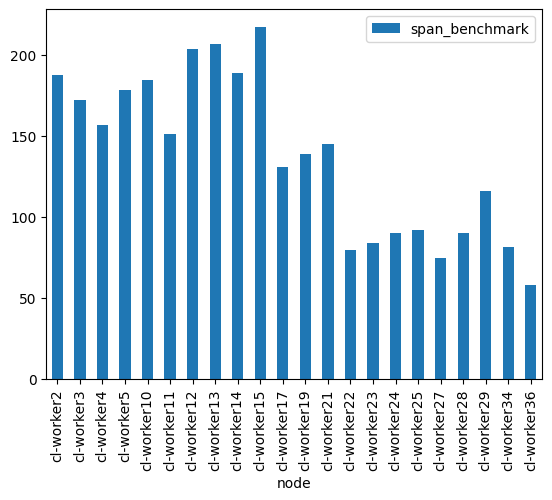

In [188]:
avg_per_node.plot.bar()

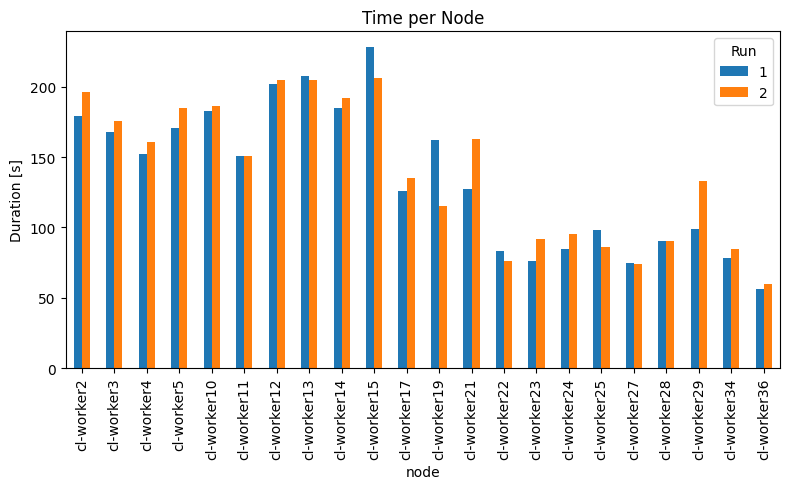

num_client,1,2
node,,
cl-worker2,179,196
cl-worker3,168,176
cl-worker4,152,161
cl-worker5,171,185
cl-worker10,183,186
cl-worker11,151,151
cl-worker12,202,205
cl-worker13,208,205
cl-worker14,185,192


In [196]:
import matplotlib.pyplot as plt

# Unstack so that num_client is on the x-axis and each node is a separate bar
df_unstacked = df_sorted['span_benchmark'].unstack(level=1)
sorted_index = natural_sort(df_unstacked.index)
df_unstacked = df_unstacked.loc[sorted_index]

# Plot the grouped bar chart
df_unstacked.plot(kind='bar', figsize=(8, 5))

plt.ylabel("Duration [s]")
plt.title("Time per Node")
plt.legend(title='Run')
#plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("time_per_node.png", dpi=300)
plt.show()
df_unstacked

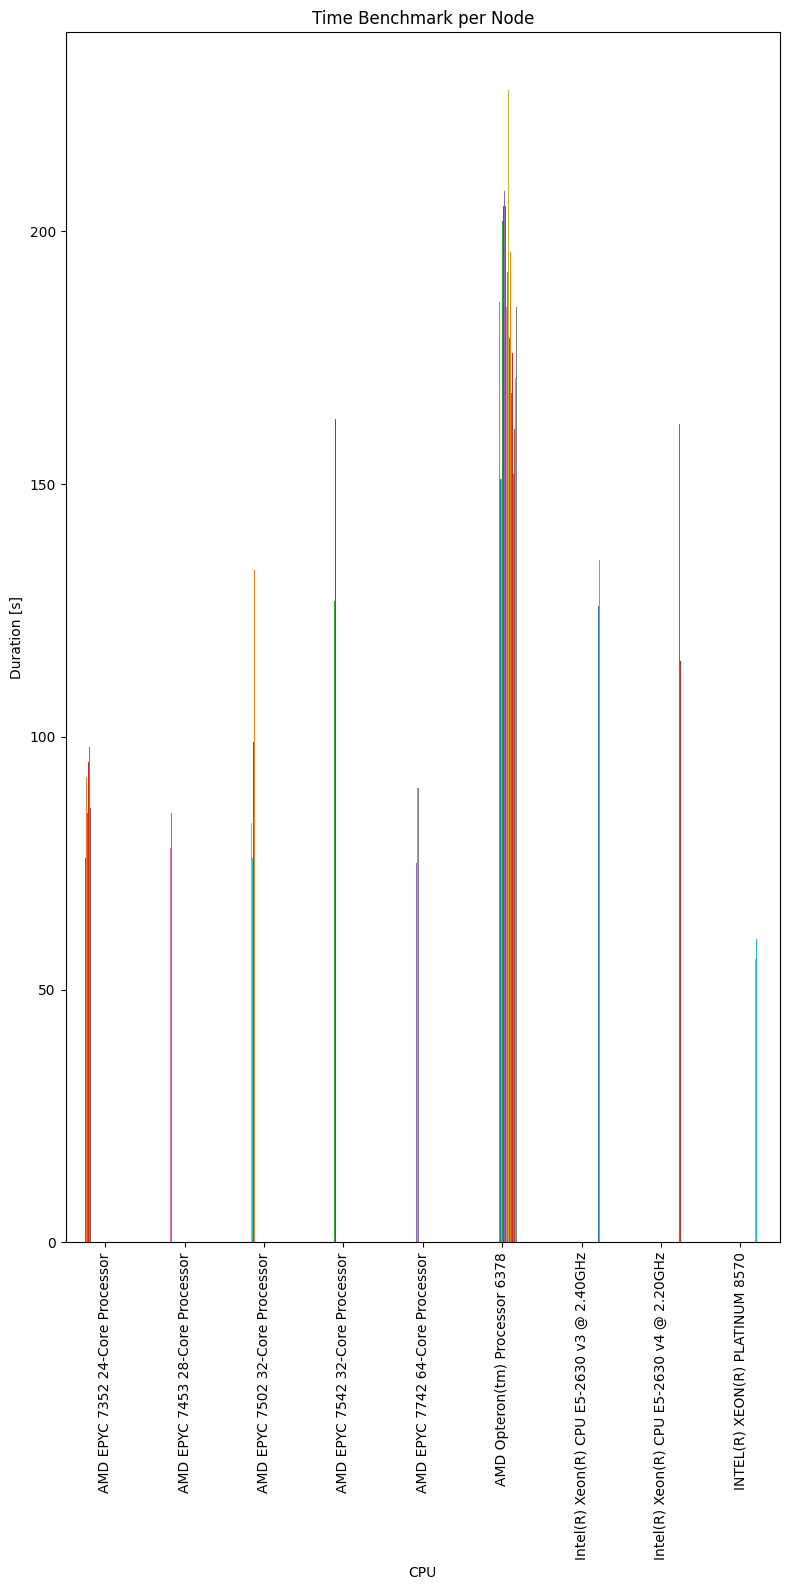

node                                      cl-worker23       cl-worker24        \
num_client                                          1     2           1     2   
CPU                                                                             
AMD EPYC 7352 24-Core Processor                  76.0  92.0        85.0  95.0   
AMD EPYC 7453 28-Core Processor                   NaN   NaN         NaN   NaN   
AMD EPYC 7502 32-Core Processor                   NaN   NaN         NaN   NaN   
AMD EPYC 7542 32-Core Processor                   NaN   NaN         NaN   NaN   
AMD EPYC 7742 64-Core Processor                   NaN   NaN         NaN   NaN   
AMD Opteron(tm) Processor 6378                    NaN   NaN         NaN   NaN   
Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz         NaN   NaN         NaN   NaN   
Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz         NaN   NaN         NaN   NaN   
INTEL(R) XEON(R) PLATINUM 8570                    NaN   NaN         NaN   NaN   

node                                      cl-worker25       cl-worker34        \
num_client                                          1     2           1     2   
CPU                                                                             
AMD EPYC 7352 24-Core Processor                  98.0  86.0         NaN   NaN   
AMD EPYC 7453 28-Core Processor                   NaN   NaN        78.0  85.0   
AMD EPYC 7502 32-Core Processor                   NaN   NaN         NaN   NaN   
AMD EPYC 7542 32-Core Processor                   NaN   NaN         NaN   NaN   
AMD EPYC 7742 64-Core Processor                   NaN   NaN         NaN   NaN   
AMD Opteron(tm) Processor 6378                    NaN   NaN         NaN   NaN   
Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz         NaN   NaN         NaN   NaN   
Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz         NaN   NaN         NaN   NaN   
INTEL(R) XEON(R) PLATINUM 8570                    NaN   NaN         NaN   NaN   

node                                      cl-worker22        ... cl-worker4  \
num_client                                          1     2  ...          1   
CPU                                                          ...              
AMD EPYC 7352 24-Core Processor                   NaN   NaN  ...        NaN   
AMD EPYC 7453 28-Core Processor                   NaN   NaN  ...        NaN   
AMD EPYC 7502 32-Core Processor                  83.0  76.0  ...        NaN   
AMD EPYC 7542 32-Core Processor                   NaN   NaN  ...        NaN   
AMD EPYC 7742 64-Core Processor                   NaN   NaN  ...        NaN   
AMD Opteron(tm) Processor 6378                    NaN   NaN  ...      152.0   
Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz         NaN   NaN  ...        NaN   
Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz         NaN   NaN  ...        NaN   
INTEL(R) XEON(R) PLATINUM 8570                    NaN   NaN  ...        NaN   

node                                             cl-worker5         \
num_client                                     2          1      2   
CPU                                                                  
AMD EPYC 7352 24-Core Processor              NaN        NaN    NaN   
AMD EPYC 7453 28-Core Processor              NaN        NaN    NaN   
AMD EPYC 7502 32-Core Processor              NaN        NaN    NaN   
AMD EPYC 7542 32-Core Processor              NaN        NaN    NaN   
AMD EPYC 7742 64-Core Processor              NaN        NaN    NaN   
AMD Opteron(tm) Processor 6378             161.0      171.0  185.0   
Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz    NaN        NaN    NaN   
Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz    NaN        NaN    NaN   
INTEL(R) XEON(R) PLATINUM 8570               NaN        NaN    NaN   

node                                      cl-worker36       cl-worker17  \
num_client                                          1     2           1   
CPU                                                                       
AMD EPYC 7352 24-Core Processor        

In [190]:
benchmark_start = df_time.groupby(['CPU', 'node', 'num_client']).min('benchmark_start')
benchmark_end = df_time.groupby(['CPU', 'node', 'num_client']).max('benchmark_end')
df_benchmark = pd.DataFrame(benchmark_end['benchmark_end'] - benchmark_start['benchmark_start'])
df_benchmark.columns = ['span_benchmark']

#sorted_index = natural_sort_multiindex(df_benchmark.index, level=[0, 1])
#df_sorted = df_benchmark.loc[sorted_index]

df_unstacked = df_benchmark['span_benchmark'].unstack(level=[1,2])
sorted_index = natural_sort(df_unstacked.index)
df_unstacked = df_unstacked.loc[sorted_index]

# Plot the grouped bar chart
df_unstacked.plot(kind='bar', figsize=(8, 16))

plt.ylabel("Duration [s]")
plt.title("Time Benchmark per Node")
#plt.legend(title='Run')
#plt.xticks(rotation=0)
plt.legend().remove()
plt.tight_layout()
plt.show()
df_unstacked


In [191]:
df_benchmark

span_benchmark
CPU                                       node        num_client                
AMD EPYC 7352 24-Core Processor           cl-worker23 1                       76
                                                      2                       92
                                          cl-worker24 1                       85
                                                      2                       95
                                          cl-worker25 1                       98
                                                      2                       86
AMD EPYC 7453 28-Core Processor           cl-worker34 1                       78
                                                      2                       85
AMD EPYC 7502 32-Core Processor           cl-worker22 1                       83
                                                      2                       76
                                          cl-worker29 1                       99
                                                      2                      133
AMD EPYC 7542 32-Core Processor           cl-worker21 1                      127
                                                      2                      163
AMD EPYC 7742 64-Core Processor           cl-worker27 1                       75
                                                      2                       74
                                          cl-worker28 1                       90
                                                      2                       90
AMD Opteron(tm) Processor 6378            cl-worker10 1                      183
                                                      2                      186
                                          cl-worker11 1                      151
                                                      2                      151
                                          cl-worker12 1                      202
                                                      2                      205
                                          cl-worker13 1                      208
                                                      2                      205
                                          cl-worker14 1                      185
                                                      2                      192
                                          cl-worker15 1                      228
                                                      2                      206
                                          cl-worker2  1                      179
                                                      2                      196
                                          cl-worker3  1                      168
                                                      2                      176
                                          cl-worker4  1                      152
                                                      2                      161
                                          cl-worker5  1                      171
                                                      2                      185
INTEL(R) XEON(R) PLATINUM 8570            cl-worker36 1                       56
                                                      2                       60
Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz cl-worker17 1                      126
                                                      2                      135
Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz cl-worker19 1                      162
                                                      2                      115

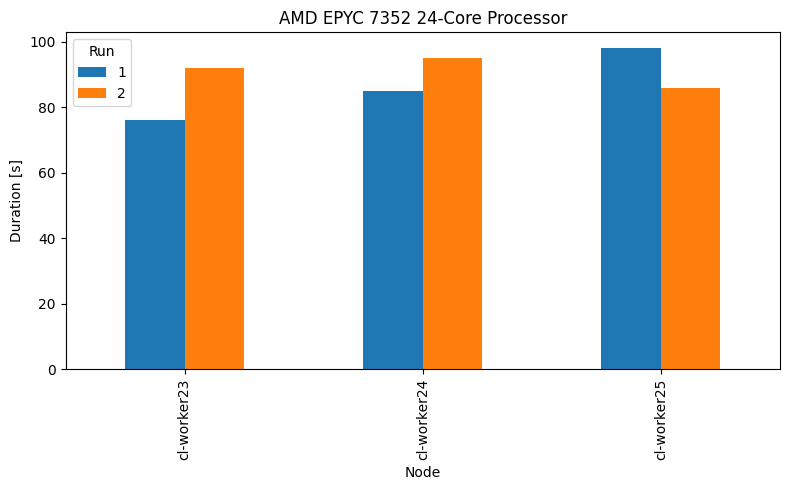

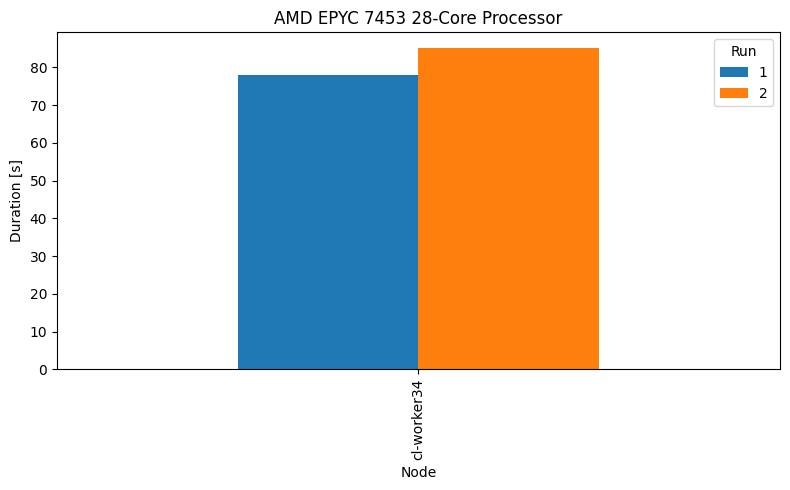

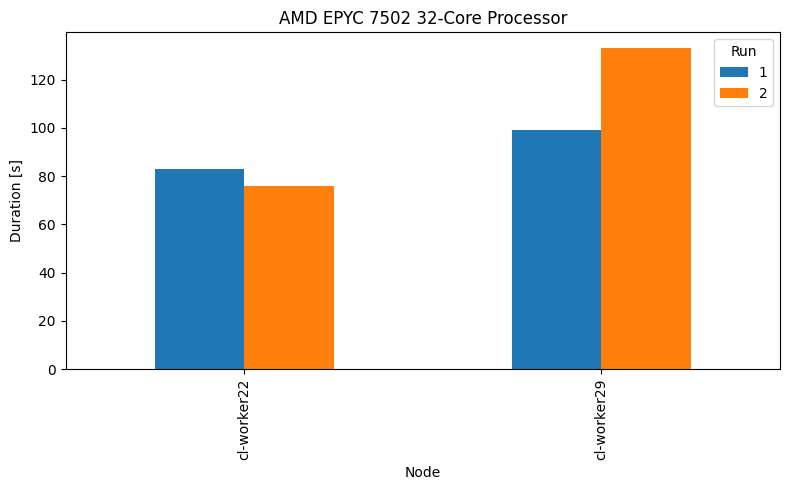

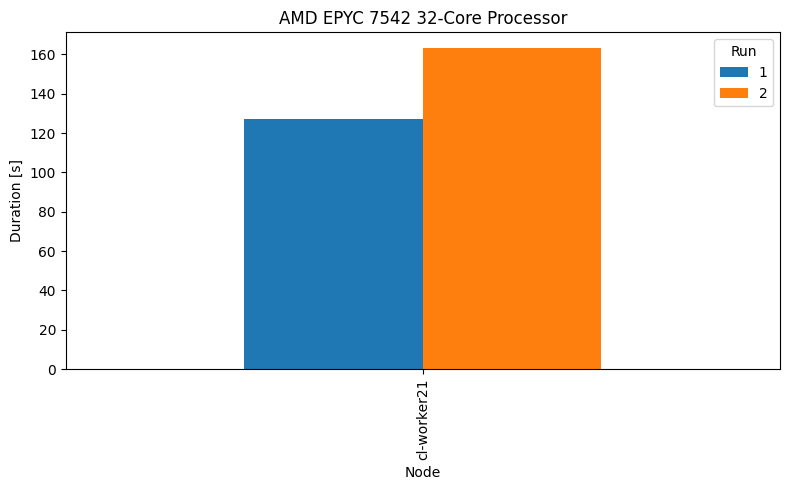

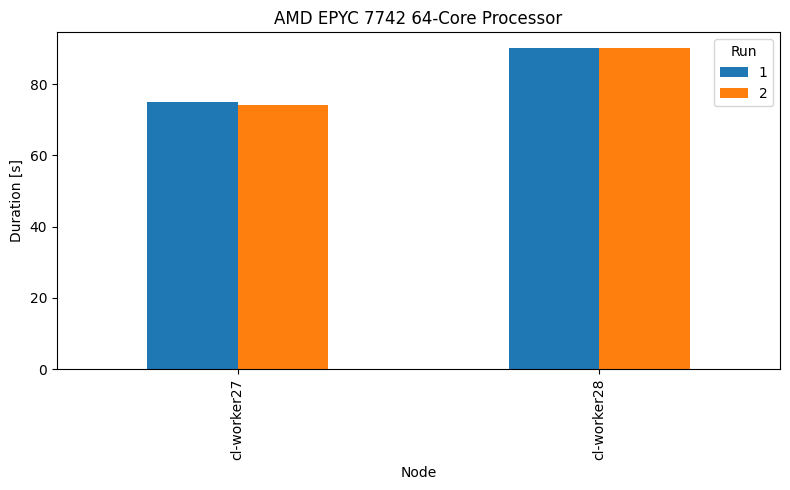

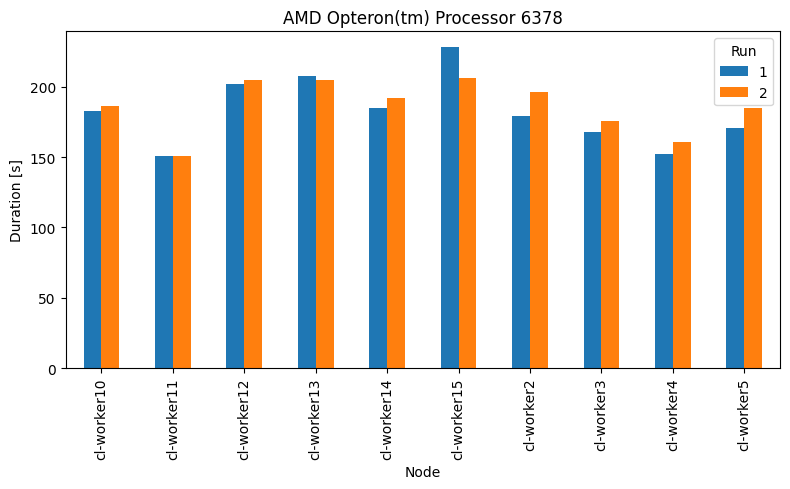

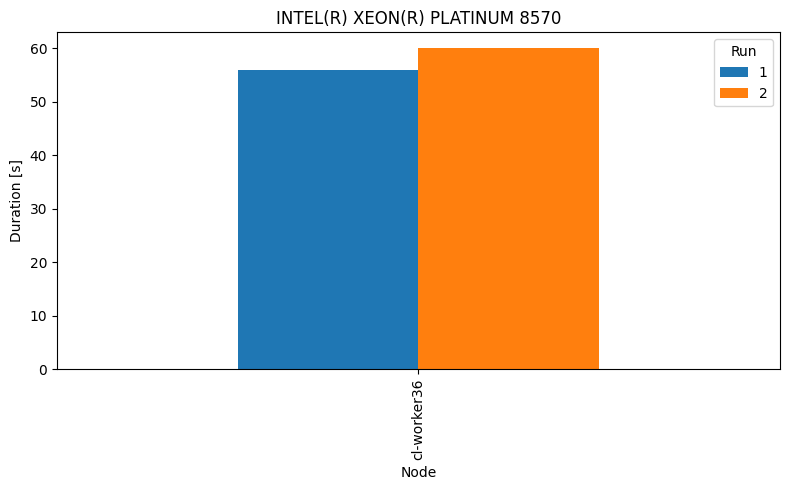

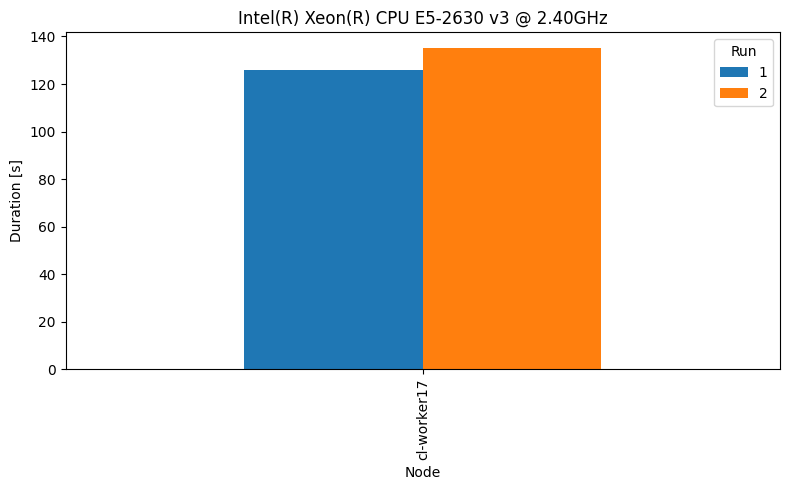

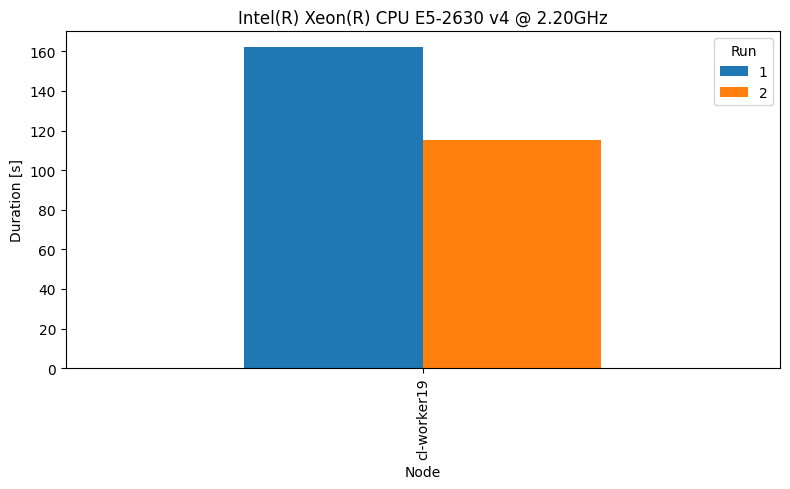

In [192]:
df = df_benchmark.copy()
# Group by CPU
for cpu, cpu_df in df.groupby(level='CPU'):
    # Unstack to get nodes as columns, num_client as x-axis
    cpu_df = cpu_df.droplevel('CPU')
    df_unstacked = cpu_df['span_benchmark'].unstack(level='num_client')

    # Plot
    ax = df_unstacked.plot(kind='bar', figsize=(8, 5), title=cpu)
    ax.set_ylabel("Duration [s]")
    ax.set_xlabel("Node")
    ax.legend(title='Run')
    ax.set_xticks(range(len(df_unstacked.index)))
    ax.set_xticklabels(df_unstacked.index, rotation=90)
    plt.tight_layout()
    plt.show()


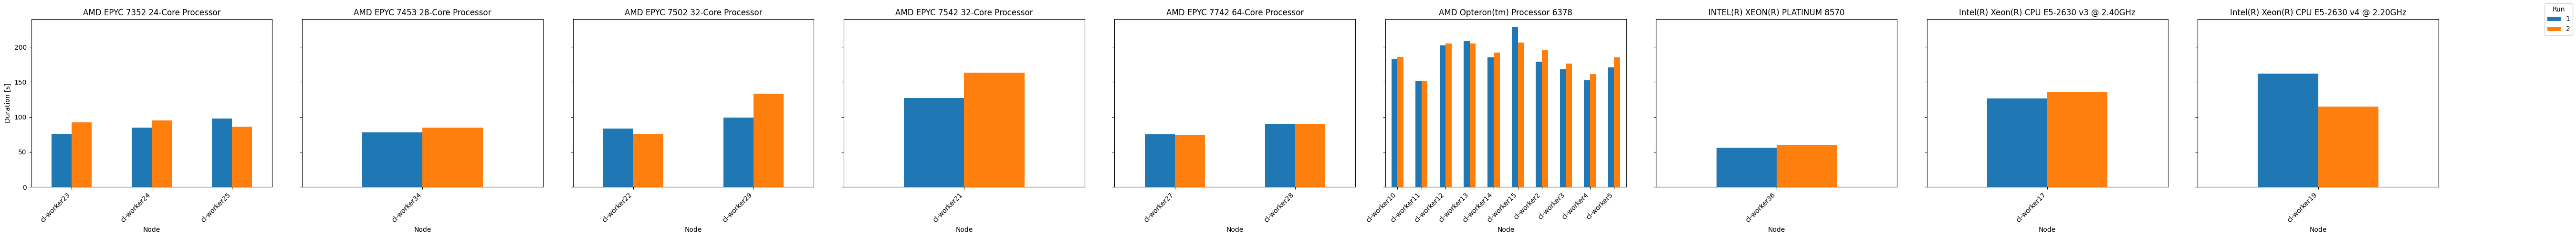

In [197]:
import matplotlib.pyplot as plt

# Get unique CPUs
cpus = df.index.get_level_values('CPU').unique()
n_cpus = len(cpus)

# Create subplots — one row of plots
fig, axes = plt.subplots(nrows=1, ncols=n_cpus, figsize=(6 * n_cpus, 5), sharey=True)

# If only one CPU, axes is not a list — make it iterable
if n_cpus == 1:
    axes = [axes]

# Loop through CPUs and plot into each subplot
for ax, cpu in zip(axes, cpus):
    cpu_df = df.xs(cpu, level='CPU')  # slice data for this CPU
    df_unstacked = cpu_df['span_benchmark'].unstack(level='num_client')

    df_unstacked.plot(kind='bar', ax=ax, legend=False)

    ax.set_title(cpu)
    ax.set_xlabel("Node")
    ax.set_ylabel("Duration [s]")
    ax.set_xticks(range(len(df_unstacked.index)))
    ax.set_xticklabels(df_unstacked.index, rotation=45, ha='right')

# Add one legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Run', loc='upper right')

plt.tight_layout(rect=[0, 0, 0.95, 1])  # leave space for legend

# Save to file
plt.savefig("time_by_cpu.png", dpi=300)
plt.show()
plt.close()


In [201]:
df_hw = df_time.copy()
df_hw[['node', 'cpu_total_stream']]

,node,cpu_total_stream
MonetDB-BHT-8-1-1,cl-worker10,314.008091
MonetDB-BHT-8-2-1,cl-worker10,283.743983
MonetDB-BHT-8-1-1,cl-worker12,311.790875
MonetDB-BHT-8-2-1,cl-worker12,325.133169
MonetDB-BHT-8-1-1,cl-worker13,290.397798
MonetDB-BHT-8-2-1,cl-worker13,330.605916
MonetDB-BHT-8-1-1,cl-worker14,244.253285
MonetDB-BHT-8-2-1,cl-worker14,261.700926
MonetDB-BHT-8-1-1,cl-worker15,279.491199
MonetDB-BHT-8-2-1,cl-worker15,325.979949


In [204]:
df_hw = df_time.copy()
df_hw['mem_max_stream'] = df_hw['mem_max_stream']/1024
df_hw[['node', 'mem_max_stream']].sort_values('node')

,node,mem_max_stream
MonetDB-BHT-8-1-1,cl-worker10,17.520031
MonetDB-BHT-8-2-1,cl-worker10,17.272800
MonetDB-BHT-8-1-1,cl-worker11,17.743889
MonetDB-BHT-8-2-1,cl-worker11,17.941811
MonetDB-BHT-8-1-1,cl-worker12,17.644512
MonetDB-BHT-8-2-1,cl-worker12,17.836033
MonetDB-BHT-8-1-1,cl-worker13,17.317394
MonetDB-BHT-8-2-1,cl-worker13,17.351261
MonetDB-BHT-8-1-1,cl-worker14,18.385490
MonetDB-BHT-8-2-1,cl-worker14,17.337372


## Plot Throughput

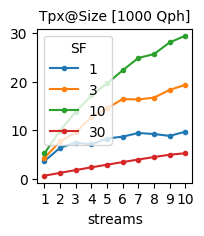

In [18]:
%matplotlib inline

df_benchmark_plot = df_benchmark.unstack(level=0).droplevel(0)
df_benchmark_plot['tpx'] = df_benchmark_plot['tpx']/1000
ax = df_benchmark_plot.plot(y='tpx', figsize=(2,2), grid=False, style=".-")
plt.title('Tpx@Size [1000 Qph]'.format(dbms), fontsize=10)
plt.suptitle('')
ax.set_xlabel("streams")
ax.set_xticks(range(1,11))
#plt.title("Tpx generate to disk [Gb/h]".format(dbms=dbms, imported=imported), fontsize=10)
#df_benchmark_plot.droplevel(0)

In [19]:
#df_time_multiindex = df_time.set_index(['SF', 'num_experiment', 'num_client'])
#df_time_multiindex

## Plot Hardware Metrics

In [20]:
df_time_hw = df_time.groupby(['SF', 'num_experiment', 'num_client']).max()

df_time_hw

benchmark_geo  benchmark_mean  generate  ingest  \
SF num_experiment num_client                                                    
1  1              1                0.626844        0.870090       0.0    17.0   
                  2                0.627641        0.879075       0.0    17.0   
                  3                0.632130        0.899522       0.0    17.0   
                  4                0.630736        0.888230       0.0    17.0   
                  5                0.636013        0.924576       0.0    17.0   
                  6                0.640728        0.908141       0.0    17.0   
                  7                0.640812        0.916236       0.0    17.0   
                  8                0.632665        0.904015       0.0    17.0   
                  9                0.639336        0.914431       0.0    17.0   
                  10               0.650121        0.927470       0.0    17.0   
3  1              1                1.637411        2.337024       0.0    56.0   
                  2                1.629153        2.392267       0.0    56.0   
                  3                1.659287        2.451833       0.0    56.0   
                  4                1.660253        2.438937       0.0    56.0   
                  5                1.679546        2.461815       0.0    56.0   
                  6                1.701831        2.497585       0.0    56.0   
                  7                1.783129        2.628219       0.0    56.0   
                  8                1.827464        2.639318       0.0    56.0   
                  9                1.885180        2.698596       0.0    56.0   
                  10               2.000874        2.866765       0.0    56.0   
10 1              1                4.249538        6.697040       0.0   205.0   
                  2                4.256660        6.792321       0.0   205.0   
                  3                4.344926        7.031578       0.0   205.0   
                  4                4.403455        7.250765       0.0   205.0   
                  5                4.604848        7.543895       0.0   205.0   
                  6                4.858891        7.775989       0.0   205.0   
                  7                5.170702        8.477382       0.0   205.0   
                  8                5.374004        8.769735       0.0   205.0   
                  9                5.676579        9.179535       0.0   205.0   
                  10               6.060483        9.544057       0.0   205.0   
30 1              1               11.848516       20.773472       0.0   672.0   
                  2               11.590215       21.159031       0.0   672.0   
                  3               11.807706       21.721130       0.0   672.0   
                  4               12.315965       22.365024       0.0   672.0   
                  5               13.244481       24.931526       0.0   672.0   
                  6               14.096852       26.204070       0.0   672.0   
                  7               15.398105       28.600618       0.0   672.0   
                  8               16.289964       30.197897       0.0   672.0   
                  9               17.628742       32.871015       0.0   672.0   
                  10              19.279709       41.397282       0.0   672.0   

                              initconstraints  initindexes  initschema  \
SF num_experiment num_client                                             
1  1              1                 29.036005     7.205218    1.211485   
                  2                 29.036005     7.205218    1.211485   
                  3                 29.036005     7.205218    1.211485   
                  4                 29.036005     7.205218    1.211485   
                  5                 29.036005     7.205218    1.211485   
                  6                 29.036005     7.205218    1.211485   
                  7                

In [21]:
df_time_benchmark = df_time.groupby(['SF', 'num_client']).max()
df_time_benchmark = pd.DataFrame(df_time_benchmark['span_benchmark']).T
df_time_benchmark.T

span_benchmark
SF num_client                
1  1                     22.0
   2                     23.0
   3                     24.0
   4                     24.0
   5                     24.0
   6                     24.0
   7                     25.0
   8                     24.0
   9                     25.0
   10                    25.0
3  1                     56.0
   2                     57.0
   3                     59.0
   4                     58.0
   5                     59.0
   6                     60.0
   7                     62.0
   8                     63.0
   9                     64.0
   10                    68.0
10 1                    153.0
   2                    154.0
   3                    160.0
   4                    165.0
   5                    172.0
   6                    176.0
   7                    192.0
   8                    198.0
   9                    207.0
   10                   215.0
30 1                   4044.0
   2                   4052.0
   3                   4064.0
   4                   4078.0
   5                   4132.0
   6                   4159.0
   7                   4209.0
   8                   4242.0
   9                   4299.0
   10                  4477.0

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)
(10, 10)
(30, 1)
(30, 2)
(30, 3)
(30, 4)
(30, 5)
(30, 6)
(30, 7)
(30, 8)
(30, 9)
(30, 10)


(0.0, 4924.700000000001)

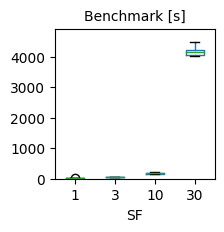

In [22]:
for index in df_time_benchmark.columns:
    print(index)
    #df_time_benchmark[(index)] = df_time_benchmark[index]/int(index[0])

df_time_benchmark.T.boxplot(column='span_benchmark', by='SF', figsize=(2,2), grid=False)
plt.title('Benchmark [s]', fontsize=10)
plt.suptitle('')
plt.ylim(0, df_time_benchmark.max().max()*1.1)

In [23]:
df_hw_pivot = df_time_hw[df_time_hw['cpu_total_stream']!=0].unstack(0)#.pivot(index='SF', columns='pods', values='cpu_total_stream')
df_hw_pivot

benchmark_geo                                 \
SF                                   1         3         10         30   
num_experiment num_client                                                
1              1               0.626844  1.637411  4.249538  11.848516   
               2               0.627641  1.629153  4.256660  11.590215   
               3               0.632130  1.659287  4.344926  11.807706   
               4               0.630736  1.660253  4.403455  12.315965   
               5               0.636013  1.679546  4.604848  13.244481   
               6               0.640728  1.701831  4.858891  14.096852   
               7               0.640812  1.783129  5.170702  15.398105   
               8               0.632665  1.827464  5.374004  16.289964   
               9               0.639336  1.885180  5.676579  17.628742   
               10              0.650121  2.000874  6.060483  19.279709   

                          benchmark_mean                                 \
SF                                    1         3         10         30   
num_experiment num_client                                                 
1              1                0.870090  2.337024  6.697040  20.773472   
               2                0.879075  2.392267  6.792321  21.159031   
               3                0.899522  2.451833  7.031578  21.721130   
               4                0.888230  2.438937  7.250765  22.365024   
               5                0.924576  2.461815  7.543895  24.931526   
               6                0.908141  2.497585  7.775989  26.204070   
               7                0.916236  2.628219  8.477382  28.600618   
               8                0.904015  2.639318  8.769735  30.197897   
               9                0.914431  2.698596  9.179535  32.871015   
               10               0.927470  2.866765  9.544057  41.397282   

                          generate       ... cpu_total_datagenerator     \
SF                              1    3   ...                      10 30   
num_experiment num_client                ...                              
1              1               0.0  0.0  ...                       0  0   
               2               0.0  0.0  ...                       0  0   
               3               0.0  0.0  ...                       0  0   
               4               0.0  0.0  ...                       0  0   
               5               0.0  0.0  ...                       0  0   
               6               0.0  0.0  ...                       0  0   
               7               0.0  0.0  ...                       0  0   
               8               0.0  0.0  ...                       0  0   
               9               0.0  0.0  ...                       0  0   
               10              0.0  0.0  ...                       0  0   

                          mem_max_benchmarker                                 \
SF                                         1            3    10           30   
num_experiment num_client                                                      
1              1                   208.652344   204.019531  0.0   238.613281   
               2                   611.730469   660.550781  0.0   653.542969   
               3                  1212.539062  1125.523438  0.0  1076.601562   
               4                  1863.578125  1840.070312  0.0  1478.449219   
               5                  2465.582031  2354.382812  0.0  1880.527344   
               6                  3037.617188  2808.136719  0.0  2268.343750   
               7                  2742.273438  2807.425781  0.0  2668.695312   
               8                  3084.117188  3293.394531  0.0  3035.449219   
               9                  3462.558594  3753.957031  0.0  3449.035156   
               10                 3894.109375  4150.222656  0.0  3723.453125   

                          cpu_total_benchmarker                       

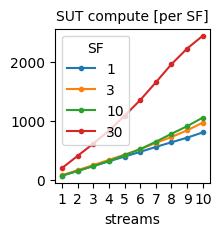

In [24]:
df_hw_pivot_2_plot  = df_hw_pivot.copy()#droplevel(0)
df_hw_pivot_2_plot
#df_hw_pivot_2_plot = df_hw_pivot_2.copy()
#df_hw_pivot_2_plot.droplevel(0)

for index in df_hw_pivot_2_plot['cpu_total_stream'].columns:
    #print(index)
    df_hw_pivot_2_plot[('cpu_total_stream',index)] = df_hw_pivot_2_plot['cpu_total_stream',index]/int(index)
    #print(df_hw_pivot_2_plot[('mem_max_stream',index)])


column = 'cpu_total_stream'
#df_hw_pivot_2_plot[column] = df_hw_pivot_2_plot[column]/1024.
#df_hw_pivot_2_plot = df_hw_pivot_2_plot['mem_max_stream'].index.droplevel(0)

#['mem_max_stream'].index.droplevel(0)
df_hw_pivot_2_plot = df_hw_pivot_2_plot.droplevel(0)

ax = df_hw_pivot_2_plot.plot(y=column, figsize=(2,2), grid=False, style=".-")
plt.title('SUT compute [per SF]'.format(dbms), fontsize=10)
plt.suptitle('')
#plt.title('Tpx@Size [1000 Qph]'.format(dbms), fontsize=10)
ax.set_xlabel("streams")
ax.set_xticks(range(1,11))
plt.legend(loc='upper left', title='SF')
#plt.ylim(0, df_means[column].max()*1.1)
#plt.xscale('log')
#plt.yscale('log')
#df_hw_pivot_2_plot.T


SF
1      8.036114
3     15.060738
10    22.657937
30    45.746578
dtype: float64

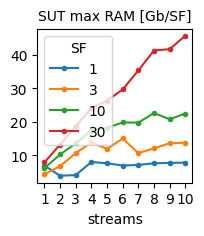

In [25]:
df_hw_pivot_2_plot  = df_hw_pivot.copy()#droplevel(0)
df_hw_pivot_2_plot
#df_hw_pivot_2_plot = df_hw_pivot_2.copy()
#df_hw_pivot_2_plot.droplevel(0)

for index in df_hw_pivot_2_plot['mem_max_stream'].columns:
    #print(index)
    df_hw_pivot_2_plot[('mem_max_stream',index)] = df_hw_pivot_2_plot['mem_max_stream',index]/int(index)
    #print(df_hw_pivot_2_plot[('mem_max_stream',index)])


column = 'mem_max_stream'
df_hw_pivot_2_plot[column] = df_hw_pivot_2_plot[column]/1024.
#df_hw_pivot_2_plot = df_hw_pivot_2_plot['mem_max_stream'].index.droplevel(0)

#['mem_max_stream'].index.droplevel(0)
df_hw_pivot_2_plot = df_hw_pivot_2_plot.droplevel(0)

ax = df_hw_pivot_2_plot.plot(y=column, figsize=(2,2), grid=False, style=".-")
plt.title('SUT max RAM [Gb/SF]'.format(dbms), fontsize=10)
plt.suptitle('')
#plt.title('Tpx@Size [1000 Qph]'.format(dbms), fontsize=10)
ax.set_xlabel("streams")
ax.set_xticks(range(1,11))
plt.legend(loc='upper left', title='SF')
#plt.ylim(0, df_means[column].max()*1.1)
#plt.xscale('log')
#plt.yscale('log')
#df_hw_pivot_2_plot.T
df_hw_pivot_2_plot[column].max()

In [26]:
df_res = pd.DataFrame()
for code in codes:
    evaluate.load_experiment(code)
    df = evaluate.get_streaming_metrics('total_cpu_util').T.max()
    df = df.reindex(index=natural_sort(df.index))
    path=resultfolder
    with open(path+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    SF = connections_sorted[0]['parameter']['connection_parameter']['loading_parameters']['SF']
    #print(df)
    df.index = df.index.map(lambda x: x[len('PostgreSQL-AWS-4-'):])
    df_res[SF] = df.copy()
    #df.T.max().plot.bar()

#print(df_res)

Results in folder .//1686234009
Read results
Load Evaluation
Results in folder .//1686236492
Read results
Load Evaluation
Results in folder .//1686228050
Read results
Load Evaluation
Results in folder .//1686238015
Read results
Load Evaluation


,1,3,10,30
DBMS,,,,
1,2.925197,6.325603,7.290536,9.000576
2,7.373190,12.891595,14.601075,18.001615
3,9.825474,15.766660,20.998972,26.572984
4,9.916559,20.264882,27.996150,34.870364
5,13.846226,21.572946,35.011020,43.971000
6,13.035102,27.996733,40.438248,52.016224
7,15.284197,35.329831,46.495163,61.151688
8,18.066155,37.752712,53.969259,63.825899
9,16.729748,36.465671,56.431668,63.813964


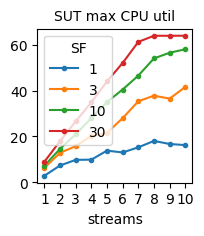

In [27]:
#fig, ax = plt.subplots()
ax = df_res.plot(figsize=(2,2), grid=False, style=".-", sharex=False)
plt.title('SUT max CPU util'.format(dbms), fontsize=10)
plt.suptitle('')
#ax.set_xlim(0,10)
ax.set_xticks(range(0,10), labels=["%s" % (int(item)) for item in df_res.index.tolist()], rotation=0)
ax.set_xlabel("streams")
#ax.get_figure().tight_layout()
#ax.xaxis.set_major_formatter(lambda x: float(x))
plt.legend(title='SF')
df_res

In [28]:
df_res = pd.DataFrame()
for code in codes:
    evaluate.load_experiment(code)
    df = evaluate.get_streaming_metrics('total_cpu_memory').T.max()
    df = df.reindex(index=natural_sort(df.index))
    path=resultfolder
    with open(path+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    SF = connections_sorted[0]['parameter']['connection_parameter']['loading_parameters']['SF']
    #print(df)
    df.index = df.index.map(lambda x: x[len('PostgreSQL-AWS-4-'):])
    df_res[SF] = df.copy()/1000
    #df.T.max().plot.bar()

#print(df_res)

Results in folder .//1686234009
Read results
Load Evaluation
Results in folder .//1686236492
Read results
Load Evaluation
Results in folder .//1686228050
Read results
Load Evaluation
Results in folder .//1686238015
Read results
Load Evaluation


,1,3,10,30
DBMS,,,,
1,7.128312,13.526434,63.269414,242.801102
2,4.038180,20.880320,105.405840,407.253375
3,4.229605,32.796660,139.284535,574.119574
4,8.228980,42.676199,178.609262,741.508152
5,7.845113,36.640883,186.933273,810.816473
6,7.161371,46.266586,203.244477,912.177176
7,7.329809,32.842848,202.702039,1086.867223
8,7.848301,37.285773,232.017277,1269.540586
9,7.971777,41.839031,213.051941,1282.160914


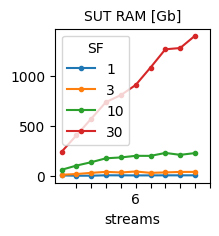

In [29]:
ax = df_res.plot(figsize=(2,2), grid=False, style=".-")
plt.title('SUT RAM [Gb]'.format(dbms), fontsize=10)
plt.suptitle('')
ax.set_xlabel("streams")
ax.set_xticks(range(1,11))
plt.legend(title='SF')

df_res

In [30]:
df_res = pd.DataFrame()
for code in codes:
    evaluate.load_experiment(code)
    df = evaluate.get_streaming_metrics('total_cpu_memory_cached').T.max()
    df = df.reindex(index=natural_sort(df.index))
    path=resultfolder
    with open(path+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    SF = connections_sorted[0]['parameter']['connection_parameter']['loading_parameters']['SF']
    #print(df)
    df.index = df.index.map(lambda x: x[len('PostgreSQL-AWS-4-'):])
    df_res[SF] = df.copy()/1000
    #df.T.max().plot.bar()

#print(df_res)

Results in folder .//1686234009
Read results
Load Evaluation
Results in folder .//1686236492
Read results
Load Evaluation
Results in folder .//1686228050
Read results
Load Evaluation
Results in folder .//1686238015
Read results
Load Evaluation


,1,3,10,30
DBMS,,,,
1,8.785402,18.434281,79.560328,265.305297
2,5.695270,25.788168,121.696754,429.757570
3,5.886695,37.704508,155.575449,596.623770
4,9.886070,47.584047,194.900176,764.012348
5,9.502203,41.548730,203.224187,833.320668
6,8.818461,51.174434,219.535391,934.681371
7,8.986898,37.750695,218.992953,1109.371418
8,9.505391,42.193621,248.308191,1292.044781
9,9.628867,46.746879,229.342855,1304.665109


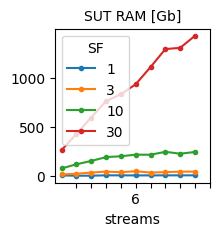

In [31]:
ax = df_res.plot(figsize=(2,2), grid=False, style=".-")
plt.title('SUT RAM [Gb]'.format(dbms), fontsize=10)
plt.suptitle('')
ax.set_xlabel("streams")
ax.set_xticks(range(1,11))
plt.legend(title='SF')

df_res

In [32]:
df_res = pd.DataFrame()
for code in codes:
    evaluate.load_experiment(code)
    df = evaluate.get_streaming_metrics('total_cpu_util_s').T.max() - evaluate.get_streaming_metrics('total_cpu_util_s').T.min()
    df = pd.DataFrame(df)
    df = df.reindex(index=natural_sort(df.index))
    path=resultfolder
    with open(path+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    SF = connections_sorted[0]['parameter']['connection_parameter']['loading_parameters']['SF']
    #print(df)
    df.index = df.index.map(lambda x: x[len('PostgreSQL-AWS-4-'):])
    df_res[SF] = df.copy()
    #df.T.max().plot.bar()

#print(df_res)

Results in folder .//1686234009
Read results
Load Evaluation
Results in folder .//1686236492
Read results
Load Evaluation
Results in folder .//1686228050
Read results
Load Evaluation
Results in folder .//1686238015
Read results
Load Evaluation


,1,3,10,30
DBMS,,,,
1,80.012976,254.895022,786.669466,6184.898335
2,160.696836,513.052090,1587.744005,12370.134032
3,241.310310,774.232907,2417.887925,18572.865874
4,320.818782,1035.374460,3275.796691,25137.664373
5,402.095493,1301.766807,4246.551481,32702.073946
6,480.793733,1580.428484,5265.466408,40614.352894
7,564.956015,1896.309787,6528.646610,49626.594767
8,643.013221,2195.282286,7860.367871,58838.671861
9,721.034614,2532.981222,9147.668042,66750.954151


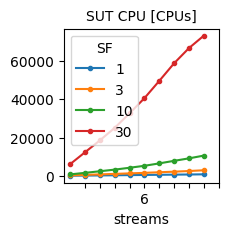

In [33]:
ax = df_res.plot(figsize=(2,2), grid=False, style=".-")
plt.title('SUT CPU [CPUs]'.format(dbms), fontsize=10)
plt.suptitle('')
ax.set_xlabel("streams")
ax.set_xticks(range(1,11))
plt.legend(title='SF')
df_res

In [34]:
df_res = pd.DataFrame()
for code in codes:
    evaluate.load_experiment(code)
    df = evaluate.get_benchmarker_metrics('total_cpu_util').T.max()
    df = df.reindex(index=natural_sort(df.index))
    path=resultfolder
    with open(path+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    SF = connections_sorted[0]['parameter']['connection_parameter']['loading_parameters']['SF']
    #print(df)
    df.index = df.index.map(lambda x: x[len('PostgreSQL-AWS-4-'):])
    df_res[SF] = df.copy()
    #df.T.max().plot.bar()

#print(df_res)

Results in folder .//1686234009
Read results
Load Evaluation
Results in folder .//1686236492
Read results
Load Evaluation
Results in folder .//1686228050
Read results
Load Evaluation
Results in folder .//1686238015
Read results
Load Evaluation


,1,3,10,30
DBMS,,,,
1,0.351637,0.452132,0.0,0.453909
2,0.274562,0.450193,0.0,0.906511
3,0.594639,0.875783,0.0,1.369124
4,0.692282,1.736767,0.0,0.482500
5,1.875298,1.333599,0.0,0.672106
6,1.182135,1.504793,0.0,2.428322
7,2.707533,2.880599,0.0,0.553262
8,1.685111,2.234767,0.0,2.064222
9,1.876792,3.372648,0.0,3.292659


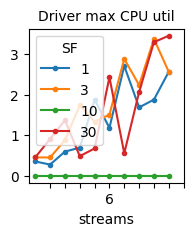

In [35]:
ax = df_res.plot(figsize=(2,2), grid=False, style=".-")
plt.title('Driver max CPU util'.format(dbms), fontsize=10)
plt.suptitle('')
ax.set_xlabel("streams")
ax.set_xticks(range(1,11))
plt.legend(title='SF')
df_res

In [36]:
df_res = pd.DataFrame()
for code in codes:
    evaluate.load_experiment(code)
    df = evaluate.get_benchmarker_metrics('total_cpu_util_max').T.max()
    df = df.reindex(index=natural_sort(df.index))
    path=resultfolder
    with open(path+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    SF = connections_sorted[0]['parameter']['connection_parameter']['loading_parameters']['SF']
    #print(df)
    df.index = df.index.map(lambda x: x[len('PostgreSQL-AWS-4-'):])
    df_res[SF] = df.copy()
    #df.T.max().plot.bar()

#print(df_res)

Results in folder .//1686234009
Read results
Load Evaluation
Results in folder .//1686236492
Read results
Load Evaluation
Results in folder .//1686228050
Read results
Load Evaluation
Results in folder .//1686238015
Read results
Load Evaluation


,1,3,10,30


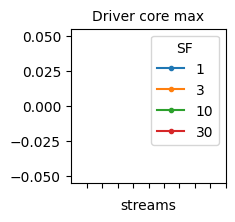

In [37]:
ax = df_res.plot(figsize=(2,2), grid=False, style=".-")
plt.title('Driver core max'.format(dbms), fontsize=10)
plt.suptitle('')
ax.set_xlabel("streams")
ax.set_xticks(range(1,11))
plt.legend(title='SF')
df_res

In [38]:
df_res = pd.DataFrame()
for code in codes:
    evaluate.load_experiment(code)
    df = evaluate.get_benchmarker_metrics('total_cpu_memory').T.max()
    df = df.reindex(index=natural_sort(df.index))
    path=resultfolder
    with open(path+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    SF = connections_sorted[0]['parameter']['connection_parameter']['loading_parameters']['SF']
    #print(df)
    df.index = df.index.map(lambda x: x[len('PostgreSQL-AWS-4-'):])
    df_res[SF] = df.copy()/1000.
    #df.T.max().plot.bar()

#print(df_res)

Results in folder .//1686234009
Read results
Load Evaluation
Results in folder .//1686236492
Read results
Load Evaluation
Results in folder .//1686228050
Read results
Load Evaluation
Results in folder .//1686238015
Read results
Load Evaluation


,1,3,10,30
DBMS,,,,
1,0.208652,0.204020,0.0,0.238613
2,0.611730,0.660551,0.0,0.653543
3,1.212539,1.125523,0.0,1.076602
4,1.863578,1.840070,0.0,1.478449
5,2.465582,2.354383,0.0,1.880527
6,3.037617,2.808137,0.0,2.268344
7,2.742273,2.807426,0.0,2.668695
8,3.084117,3.293395,0.0,3.035449
9,3.462559,3.753957,0.0,3.449035


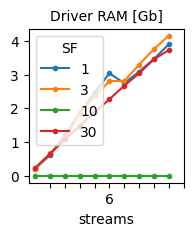

In [39]:
ax = df_res.plot(figsize=(2,2), grid=False, style=".-")
plt.title('Driver RAM [Gb]'.format(dbms), fontsize=10)
plt.suptitle('')
ax.set_xlabel("streams")
ax.set_xticks(range(1,11))
plt.legend(title='SF')
df_res

In [40]:
df_res = pd.DataFrame()
for code in codes:
    evaluate.load_experiment(code)
    df = evaluate.get_benchmarker_metrics('total_cpu_memory_cached').T.max()
    df = df.reindex(index=natural_sort(df.index))
    path=resultfolder
    with open(path+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    SF = connections_sorted[0]['parameter']['connection_parameter']['loading_parameters']['SF']
    #print(df)
    df.index = df.index.map(lambda x: x[len('PostgreSQL-AWS-4-'):])
    df_res[SF] = df.copy()/1000.
    #df.T.max().plot.bar()

#print(df_res)

Results in folder .//1686234009
Read results
Load Evaluation
Results in folder .//1686236492
Read results
Load Evaluation
Results in folder .//1686228050
Read results
Load Evaluation
Results in folder .//1686238015
Read results
Load Evaluation


,1,3,10,30
DBMS,,,,
1,0.211746,0.208016,0.0,0.244414
2,0.619078,0.672410,0.0,0.664113
3,1.226977,1.140477,0.0,1.095809
4,1.886910,1.864305,0.0,1.503844
5,2.497164,2.385965,0.0,1.914688
6,3.078094,2.848871,0.0,2.304051
7,2.780430,2.859117,0.0,2.710203
8,3.129750,3.352691,0.0,3.082242
9,3.511543,3.821375,0.0,3.505238


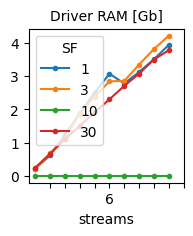

In [41]:
ax = df_res.plot(figsize=(2,2), grid=False, style=".-")
plt.title('Driver RAM [Gb]'.format(dbms), fontsize=10)
plt.suptitle('')
ax.set_xlabel("streams")
ax.set_xticks(range(1,11))
plt.legend(title='SF')
df_res

In [42]:
df_res = pd.DataFrame()
for code in codes:
    evaluate.load_experiment(code)
    df = evaluate.get_benchmarker_metrics('total_cpu_util_s').T.max() - evaluate.get_benchmarker_metrics('total_cpu_util_s').T.min()
    df = pd.DataFrame(df)
    df = df.reindex(index=natural_sort(df.index))
    path=resultfolder
    with open(path+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    SF = connections_sorted[0]['parameter']['connection_parameter']['loading_parameters']['SF']
    #print(df)
    df.index = df.index.map(lambda x: x[len('PostgreSQL-AWS-4-'):])
    df_res[SF] = df.copy()
    #df.T.max().plot.bar()

print(df_res)

Results in folder .//1686234009
Read results
Load Evaluation
found 55 connections
Results in folder .//1686236492
Read results
Load Evaluation
found 55 connections
Results in folder .//1686228050
Read results
Load Evaluation
found 55 connections
Results in folder .//1686238015
Read results
Load Evaluation
found 55 connections
              1          3   10          30
DBMS                                       
1      6.357339   7.368385  0.0   13.309727
2     12.480364  14.698020  0.0   15.027941
3     21.294983  16.856276  0.0   27.752162
4     28.945682  21.739376  0.0   42.074733
5     35.623551  25.390574  0.0   56.977909
6     41.721285  26.741739  0.0   62.487400
7     17.090795  49.581324  0.0   81.235520
8     48.048381  67.042332  0.0   98.604956
9     61.486374  75.274546  0.0  110.060736
10    61.253136  84.710041  0.0  123.735284


,1,3,10,30
DBMS,,,,
1,6.357339,7.368385,0.0,13.309727
2,12.480364,14.698020,0.0,15.027941
3,21.294983,16.856276,0.0,27.752162
4,28.945682,21.739376,0.0,42.074733
5,35.623551,25.390574,0.0,56.977909
6,41.721285,26.741739,0.0,62.487400
7,17.090795,49.581324,0.0,81.235520
8,48.048381,67.042332,0.0,98.604956
9,61.486374,75.274546,0.0,110.060736


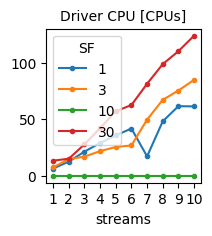

In [43]:
ax = df_res.plot(figsize=(2,2), grid=False, style=".-")
plt.title('Driver CPU [CPUs]'.format(dbms), fontsize=10)
plt.suptitle('')
ax.set_xlabel("streams")
ax.set_xticks(range(0,10), labels=["%s" % (int(item)) for item in df_res.index.tolist()], rotation=0)
plt.legend(title='SF')
df_res